In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Jena/jena_climate_2009_2016.csv" "/content/jenaweather.csv"

In [ ]:
df = pd.read_csv('/content/jenaweather.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:25]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


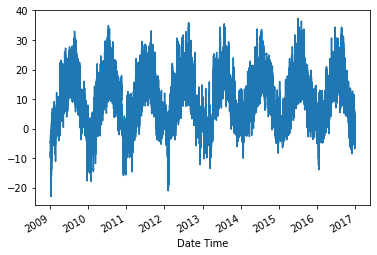

In [ ]:
temp = df['T (degC)']
temp.plot()

In [ ]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((420521, 30, 1), (420521,))

In [ ]:
X_train1, y_train1 = X1[:336440], y1[:336440]
X_val1, y_val1 = X1[336440:378496], y1[336440:378496]
X_test1, y_test1 = X1[378496:], y1[378496:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((336440, 30, 1),
 (336440,),
 (42056, 30, 1),
 (42056,),
 (42025, 30, 1),
 (42025,))

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((30, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
10513/10514 [============================>.] - ETA: 0s - loss: 7.3765 - root_mean_squared_error: 2.7160

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


10514/10514 [==============================] - 257s 24ms/step - loss: 7.3759 - root_mean_squared_error: 2.7159 - val_loss: 0.0657 - val_root_mean_squared_error: 0.2564
Epoch 2/10
10514/10514 [==============================] - ETA: 0s - loss: 0.0438 - root_mean_squared_error: 0.2094

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


10514/10514 [==============================] - 193s 18ms/step - loss: 0.0438 - root_mean_squared_error: 0.2094 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2202
Epoch 3/10
10513/10514 [============================>.] - ETA: 0s - loss: 0.0421 - root_mean_squared_error: 0.2052

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


10514/10514 [==============================] - 195s 19ms/step - loss: 0.0421 - root_mean_squared_error: 0.2052 - val_loss: 0.0431 - val_root_mean_squared_error: 0.2076
Epoch 4/10
10512/10514 [============================>.] - ETA: 0s - loss: 0.0418 - root_mean_squared_error: 0.2044

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


10514/10514 [==============================] - 195s 19ms/step - loss: 0.0418 - root_mean_squared_error: 0.2044 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2062
Epoch 5/10
10514/10514 [==============================] - 193s 18ms/step - loss: 0.0416 - root_mean_squared_error: 0.2039 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2085
Epoch 6/10
10514/10514 [==============================] - ETA: 0s - loss: 0.0414 - root_mean_squared_error: 0.2035

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


10514/10514 [==============================] - 198s 19ms/step - loss: 0.0414 - root_mean_squared_error: 0.2035 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2061
Epoch 7/10
10514/10514 [==============================] - 193s 18ms/step - loss: 0.0413 - root_mean_squared_error: 0.2032 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2093
Epoch 8/10
10514/10514 [==============================] - 195s 19ms/step - loss: 0.0412 - root_mean_squared_error: 0.2029 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2073
Epoch 9/10
10514/10514 [==============================] - 194s 18ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2072
Epoch 10/10
10514/10514 [==============================] - 193s 18ms/step - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2106


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions1 = model1.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,-9.667921,-9.67
1,-9.684341,-9.68
2,-9.697272,-9.90
3,-9.986705,-9.91
4,-9.904810,-9.51
...,...,...
336435,13.476770,13.53
336436,13.485538,13.40
336437,13.296347,13.26
336438,13.173866,13.16


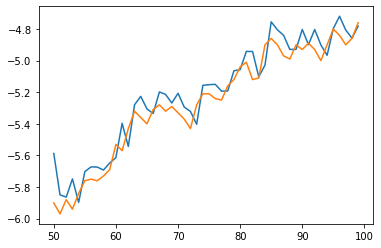

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [ ]:
val_predictions1 = model1.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,13.095150,13.13
1,13.104868,13.06
2,13.001081,12.88
3,12.777884,12.77
4,12.721279,12.73
...,...,...
42051,1.987463,1.93
42052,1.978555,1.93
42053,1.983468,1.93
42054,1.983076,1.87


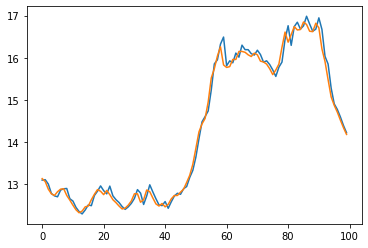

In [ ]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [ ]:
test_predictions1 = model1.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,1.932333,1.87
1,1.918096,1.86
2,1.906775,1.80
3,1.819926,1.80
4,1.858561,1.78
...,...,...
42020,-4.023999,-4.05
42021,-4.046135,-3.35
42022,-2.994394,-3.16
42023,-3.130282,-4.23


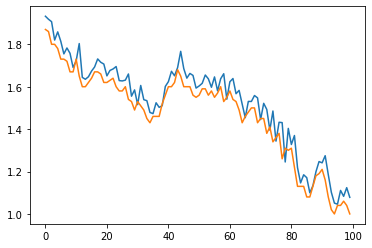

In [ ]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

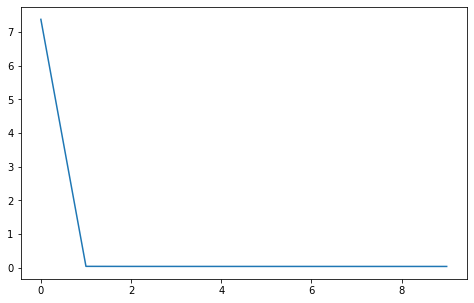

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

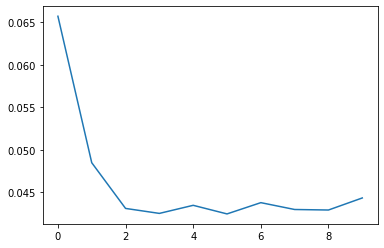

In [ ]:
plt.plot(history1.history['val_loss'])

In [ ]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(       Predictions  Actuals
 0         1.932333     1.87
 1         1.918096     1.86
 2         1.906775     1.80
 3         1.819926     1.80
 4         1.858561     1.78
 ...            ...      ...
 42020    -4.023999    -4.05
 42021    -4.046135    -3.35
 42022    -2.994394    -3.16
 42023    -3.130282    -4.23
 42024    -4.604386    -4.82
 
 [42025 rows x 2 columns], 0.04406784497016781)

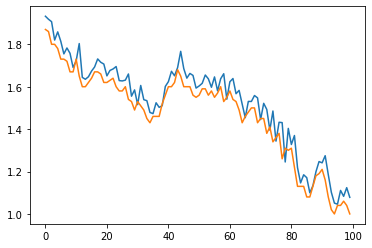

In [ ]:
plot_predictions1(model1, X_test1, y_test1)